In [1]:
import csv
import scipy.cluster.hierarchy as sch
from collections import defaultdict
byYears={}
countries = {}
data = []
genres = {}
years = [year for year in range(1956, 2020)]
with open('Genres.csv', newline='') as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        data.append(row[1:])
        if(row[0]!="YEAR"):
            byYears[row[0]]=[]
            for gen in row[1:]:
                if gen != '/':
                    byYears[row[0]].append(gen)

In [2]:
for country in data[0]:
    countries[country] = []
data = data[1:]
keys = list(countries.keys())
keys.sort()

for lista in data:
    for i in range(len(lista)):
        countries[keys[i]].append(lista[i])

In [3]:
for country in countries:
    for genre in countries[country]:
        if genre not in genres:
            genres[genre] = 1
        else:
            genres[genre] += 1


del genres['/']
genres["Country"]+=genres["Country "]
del genres["Country "]

In [4]:
for k in genres:
    print(k, ":", genres[k])

Upbeat Pop : 435
Power Ballad : 229
Pop / Rock : 120
Pop : 79
Dance Pop : 238
Sentimental Ballad : 384
Debatable : 11
Country : 28
Outlier : 3
Popera : 19
Ethnic : 7
Rock : 23


In [5]:
import matplotlib.pyplot as plt
genres = dict(sorted(genres.items(), key=lambda x:x[1], reverse=True))
keys = genres.keys()
values = genres.values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

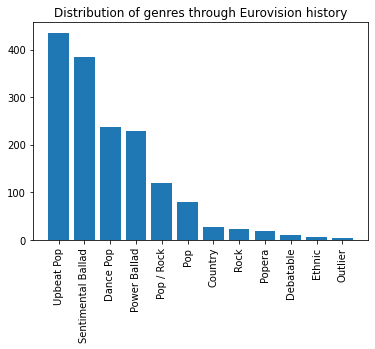

In [6]:
plt.bar(keys, values)
plt.title("Distribution of genres through Eurovision history")
plt.xticks(rotation='90')

From the graph we can see that the two most common genres in Eurovision are Upbeat Pop and Sentimental Ballad, which is, in a way, expected.

In [7]:
winnerCo={}
winCoun={}
winGen={}
cgw={}
with open('Winners.csv', newline='') as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        if row[0]!="YEAR" and row[0]!="1969":
            winCoun[row[0]]=row[1]
            winGen[row[0]]=row[2]
            winnerCo[row[1]]=[]
            if row[1] not in cgw:
                cgw[row[1]]=[]
            cgw[row[1]].append(row[2])

with open('Genres.csv') as f:
    reader = csv.DictReader(f) 
    for row in reader: 
        for (k,v) in row.items():
            if k in winnerCo and v!="/":
                winnerCo[k].append(v) 

In [8]:
cur={}
for year in byYears:
    gnr={}
    for gen in byYears[year]:
        if gen not in gnr:
            gnr[gen]=0
        gnr[gen]+=1
    gnr=sorted(gnr.items(), key = lambda x:x[1], reverse = True)
    cur[year]=gnr[0][0]
byYears=cur

In [9]:
keysYears=list(byYears.keys())
valuesYears=list(byYears.values())
valuesWin=list(winGen.values())
keysWin=list(winGen.keys())

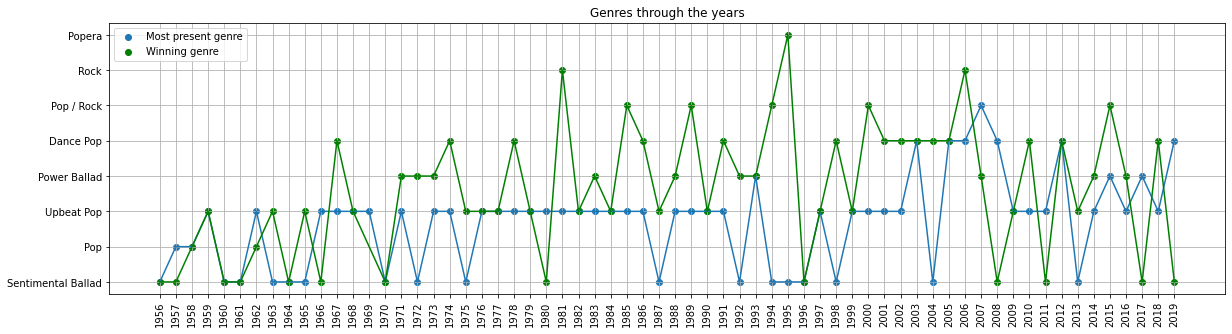

In [10]:
plt.figure(figsize=(20, 5)).add_subplot()
plt.scatter(keysYears, valuesYears, label="Most present genre")
plt.scatter(keysWin, valuesWin, label="Winning genre", c='g')
plt.plot(keysYears, valuesYears )
plt.plot(keysWin, valuesWin, c='g')
plt.title("Genres through the years")
plt.xticks(rotation='90')
plt.legend(loc='upper left');
plt.grid(True)
plt.show()

In this graph, we can see the tendency for the genres for the whole Eurovision contest, and for the winning songs.

In [11]:
valuesWinC=list(winCoun.values())
keysWinC=list(winCoun.keys())

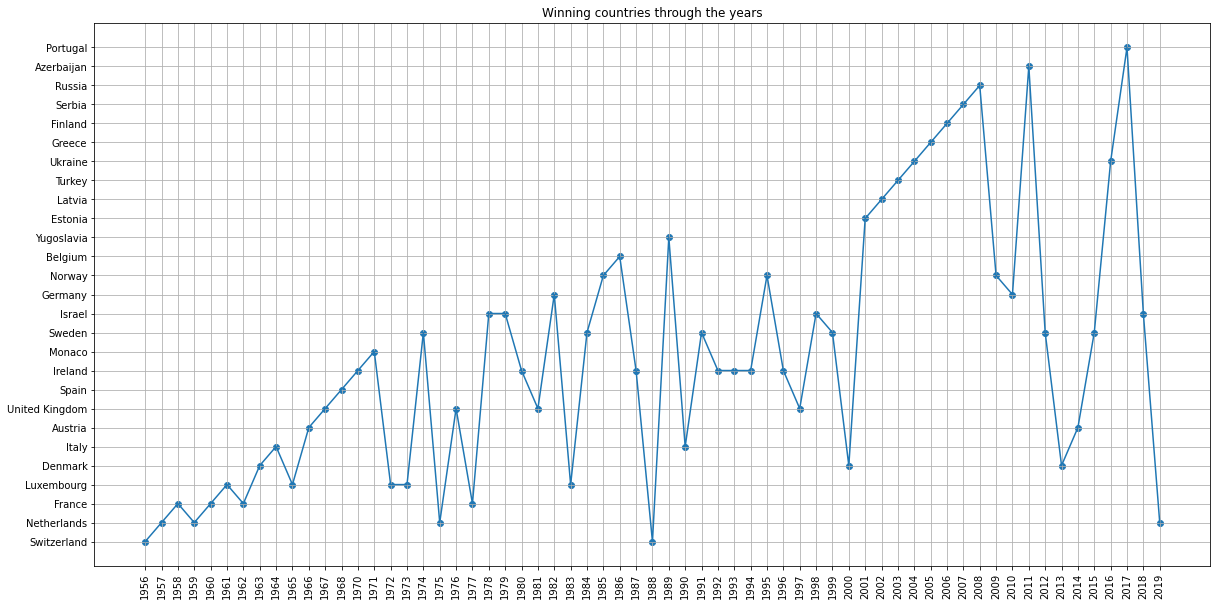

In [12]:
plt.figure(figsize=(20, 10)).add_subplot()
plt.scatter(keysWinC, valuesWinC)
plt.plot(keysWinC, valuesWinC)
plt.title("Winning countries through the years")
plt.xticks(rotation='90')
plt.grid(True)
plt.show()

### ANALYSING PARTICULAR COUNTRIES

In this part, we will analyse the data about genre representation in the winning countries.

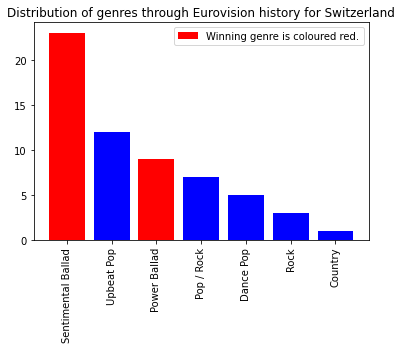

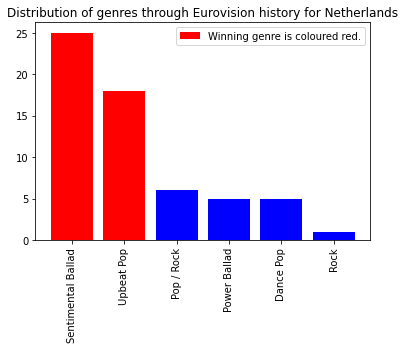

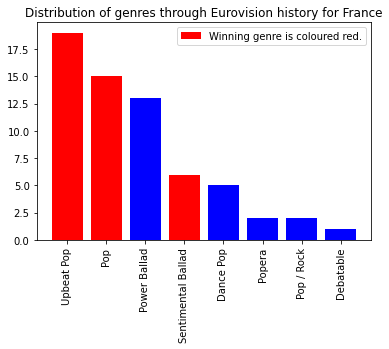

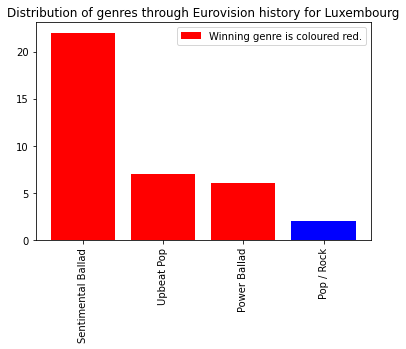

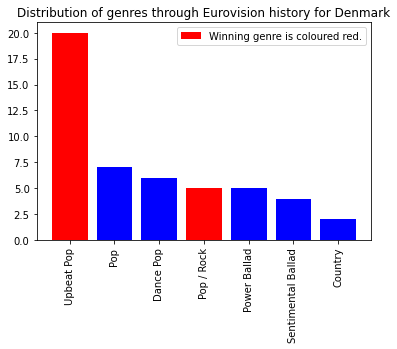

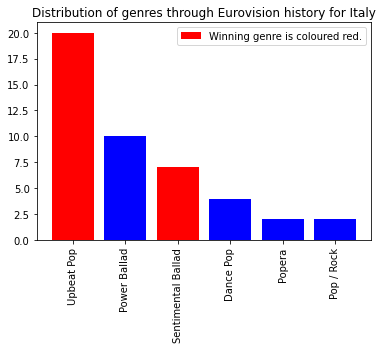

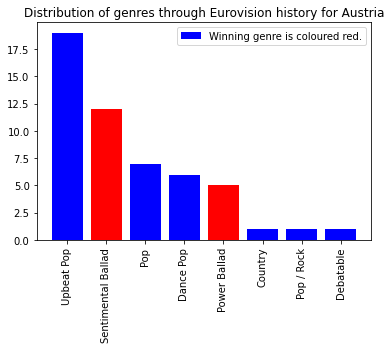

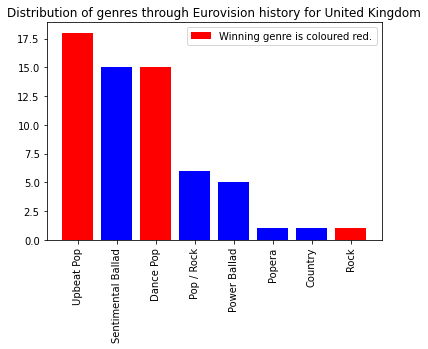

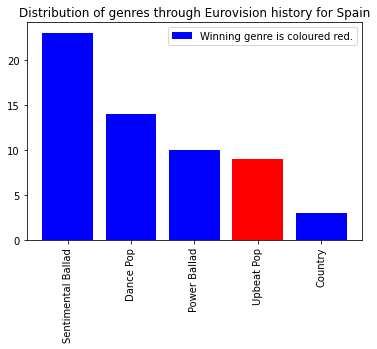

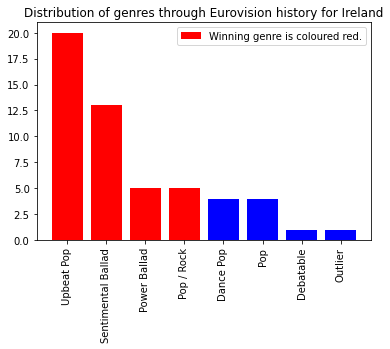

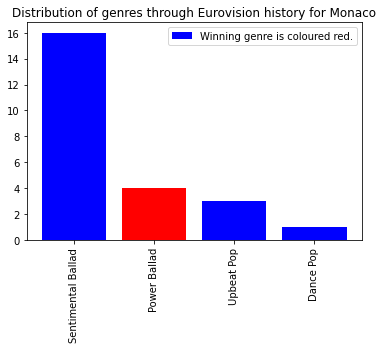

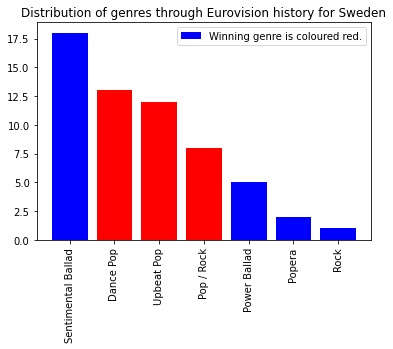

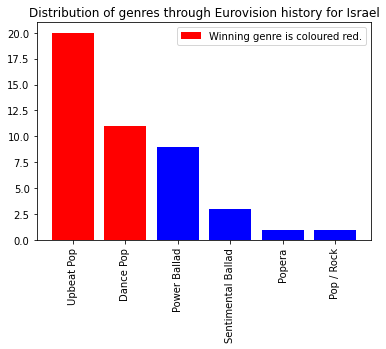

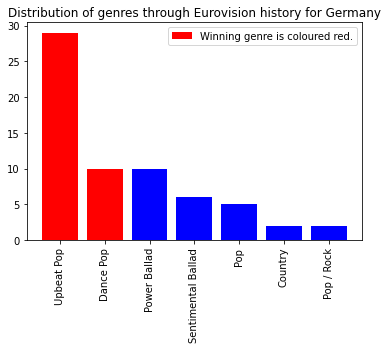

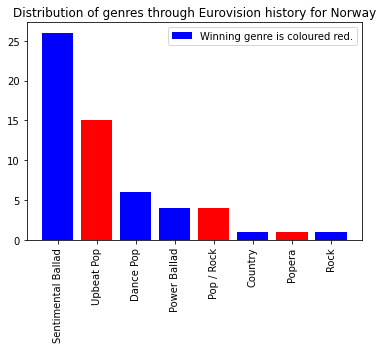

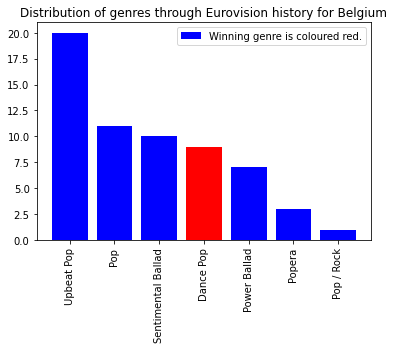

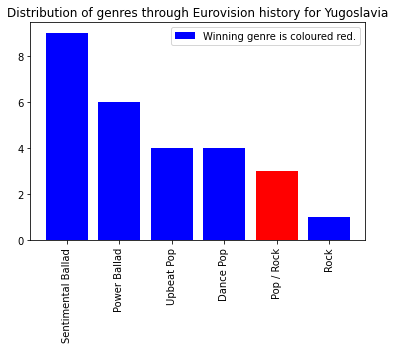

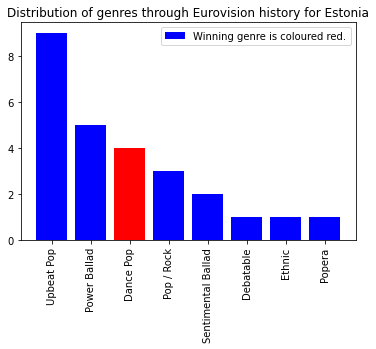

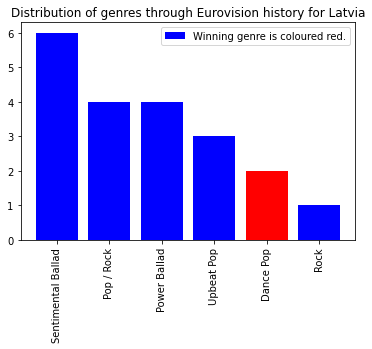

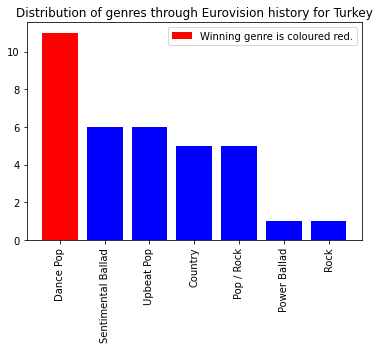

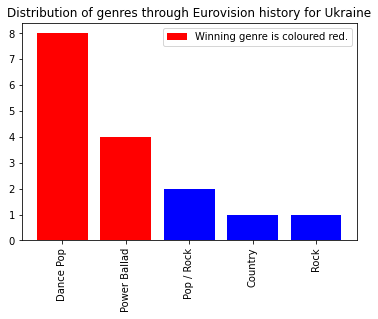

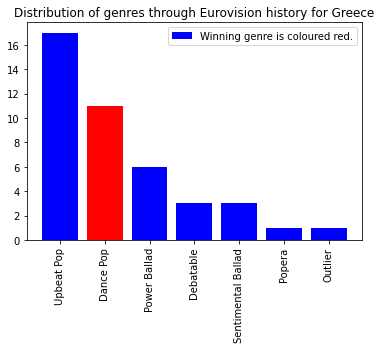

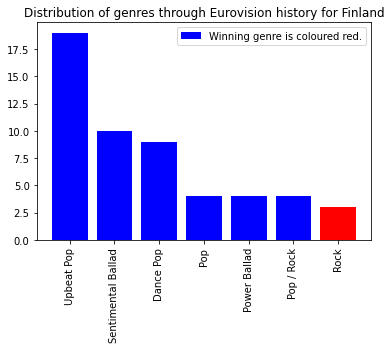

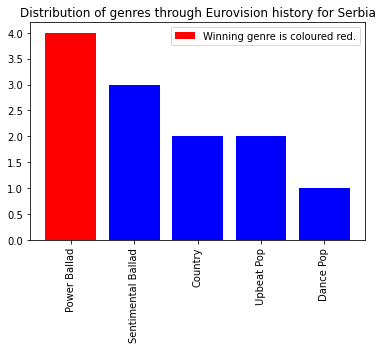

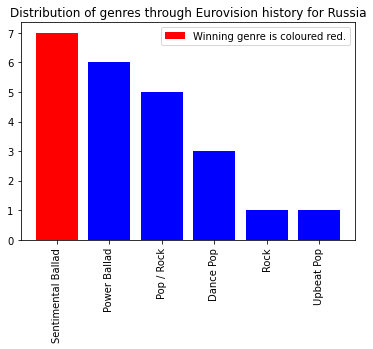

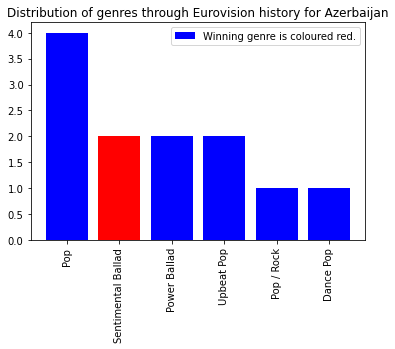

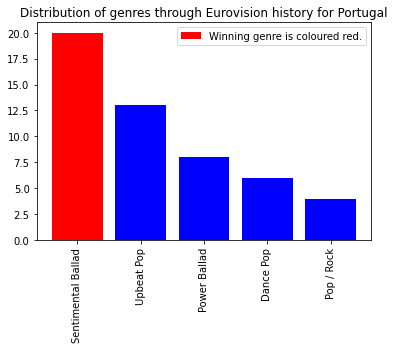

In [13]:
for country in winnerCo:
    genCo={}
    for gen in winnerCo[country]:
        if gen not in genCo:
            genCo[gen]=0
        genCo[gen]+=1
    col=[]
    genCo=dict(sorted(genCo.items(), key=lambda x:x[1], reverse=True))
    v=list(genCo.values())
    k=list(genCo.keys())
    for a in k:
        if a in cgw[country]:
            col.append('r')
        else:
            col.append('b')
    plt.bar(k, v, color=col, label="Winning genre is coloured red.")
    plt.title("Distribution of genres through Eurovision history for "+country)
    plt.xticks(rotation='90')
    plt.legend(loc='upper right');
    plt.show()


In the upper graphs, we can see the distribution of the genres for every country from the winners of Eurovision. If the winning song is a certain genre, the genre is coloured in red.

In [14]:
ygc={}
with open('Genres.csv') as f:
    reader = csv.DictReader(f) 
    for row in reader:
        for (k,v) in row.items():
            if k in winnerCo and v!="/":
                if k not in ygc:
                    ygc[k]=dict()
                ygc[k][row["YEAR"]]=v

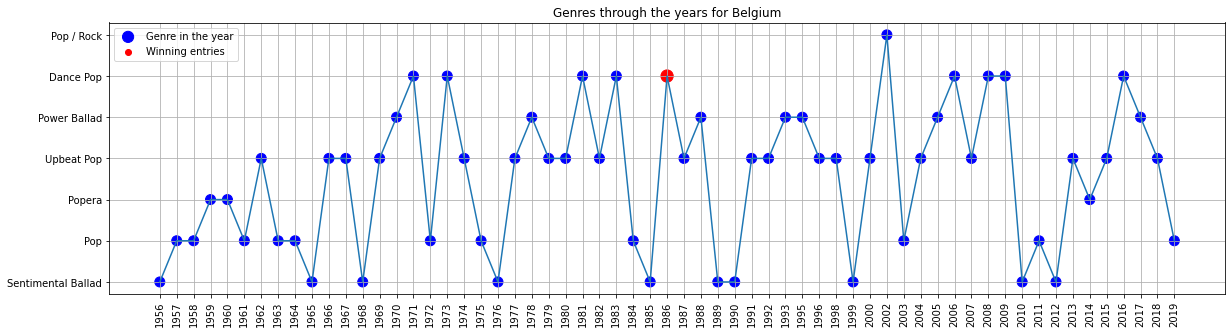

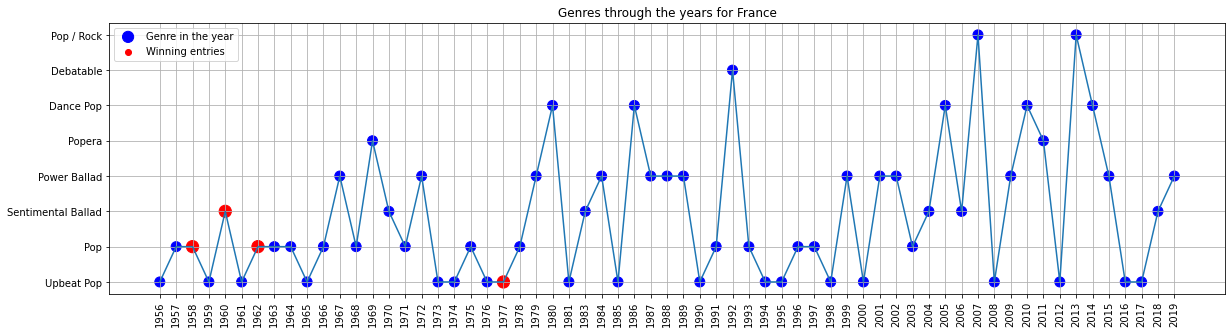

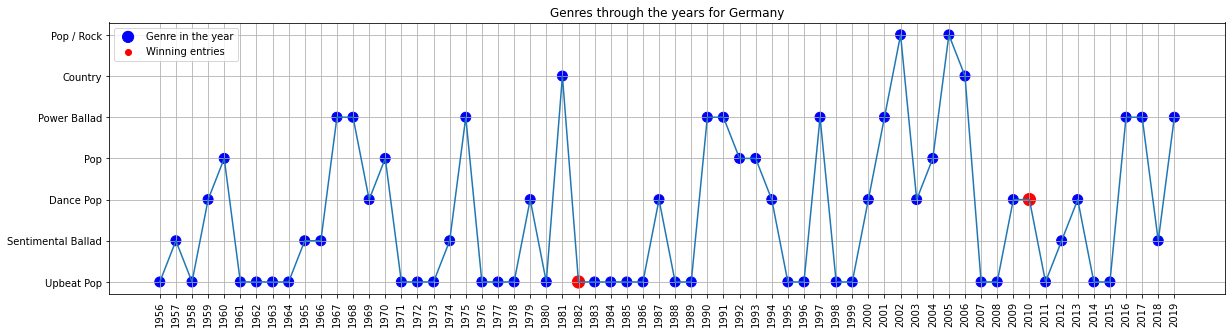

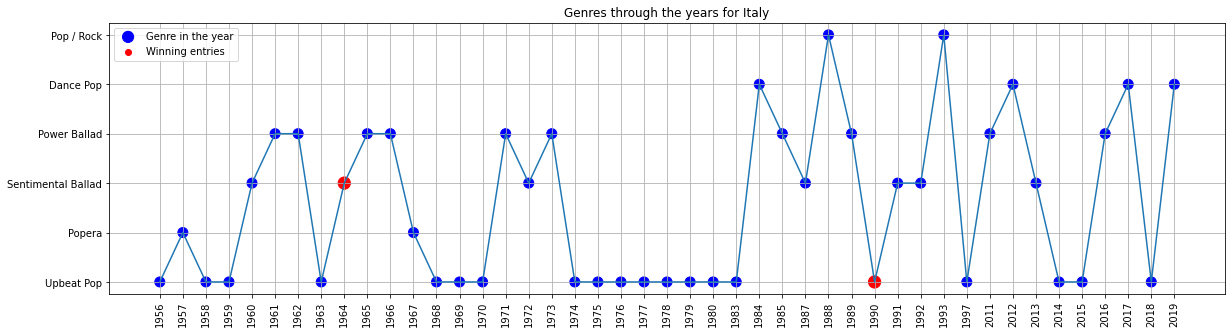

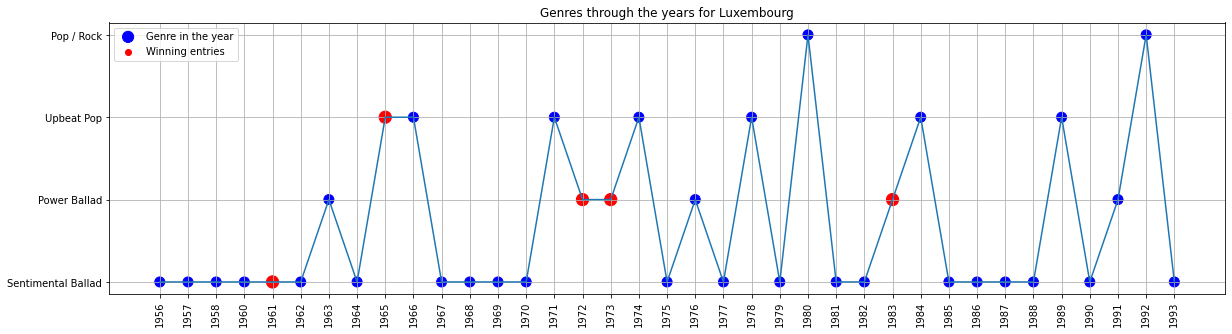

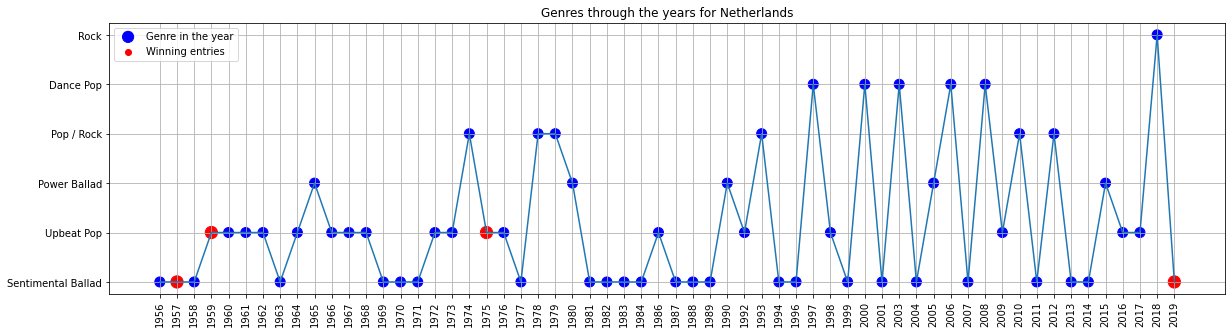

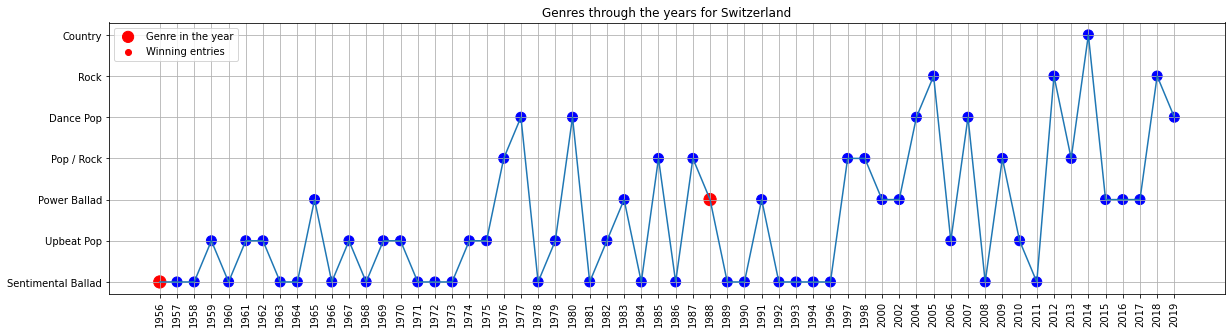

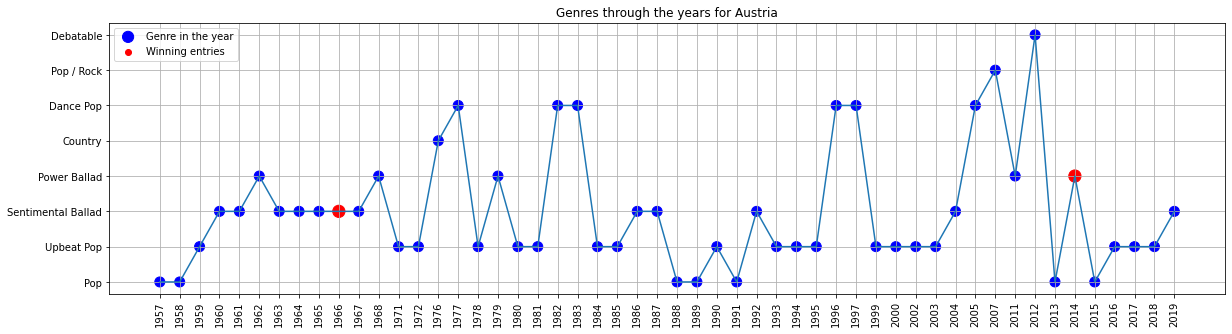

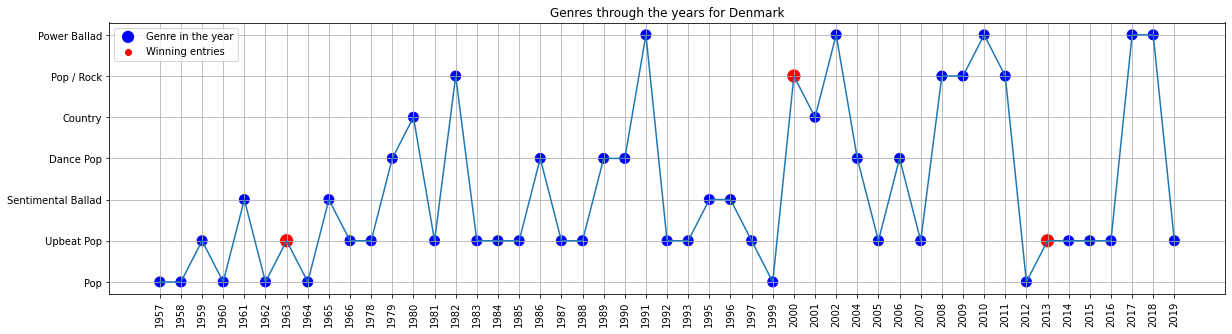

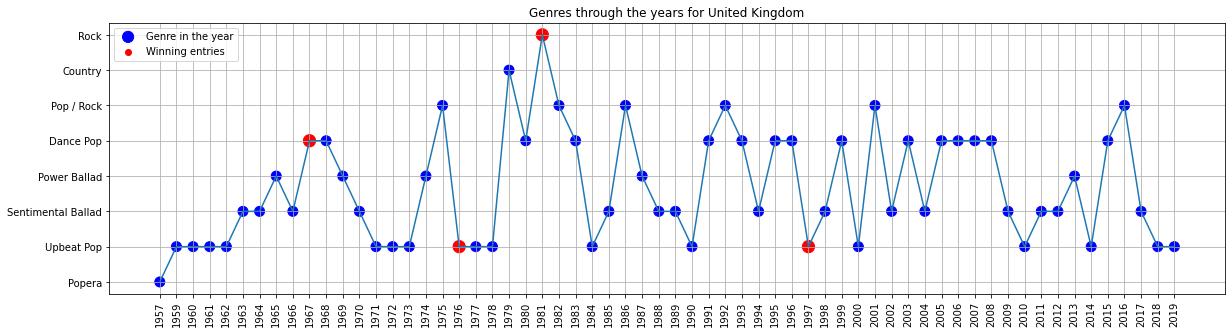

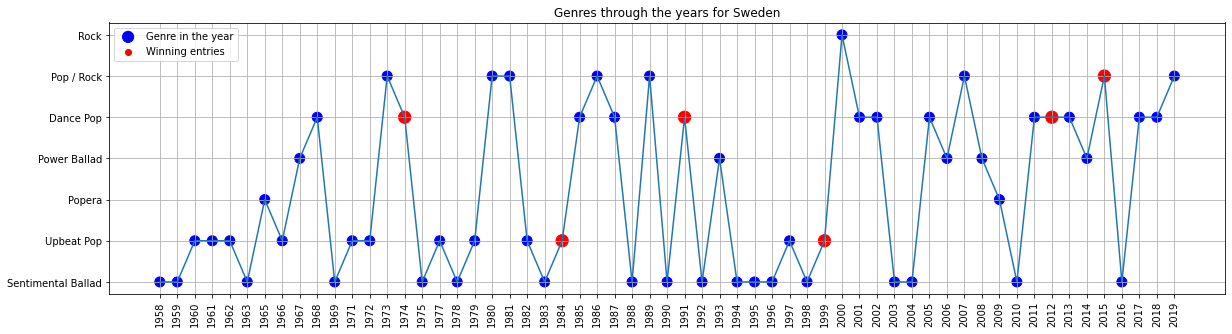

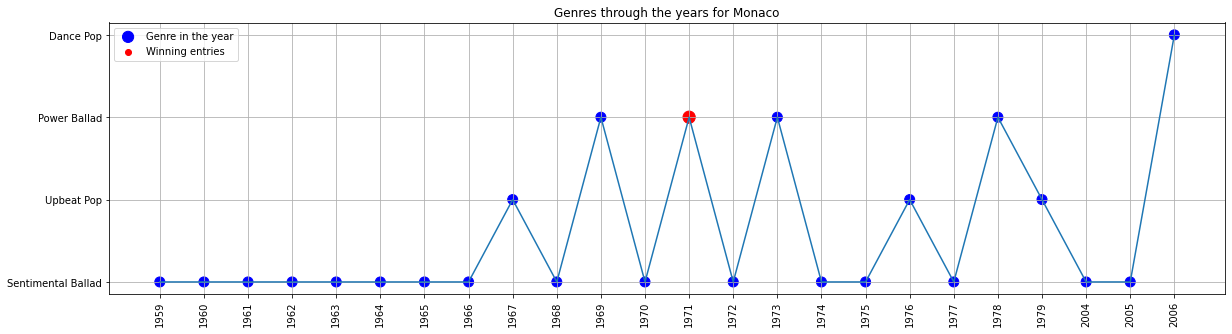

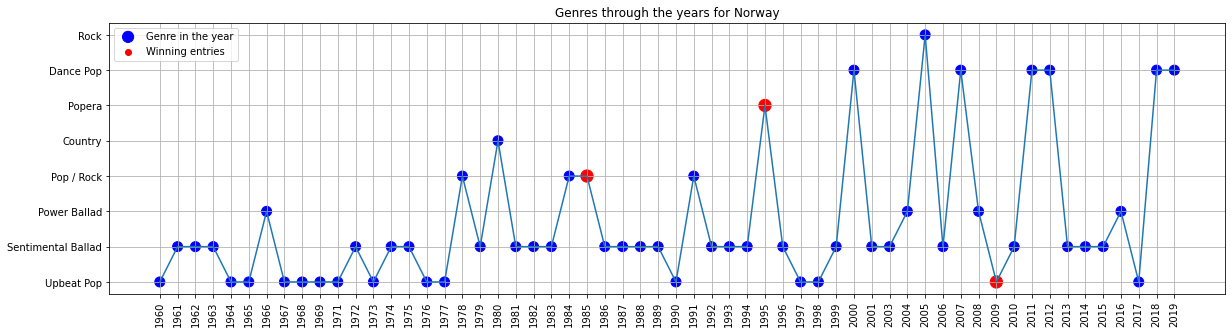

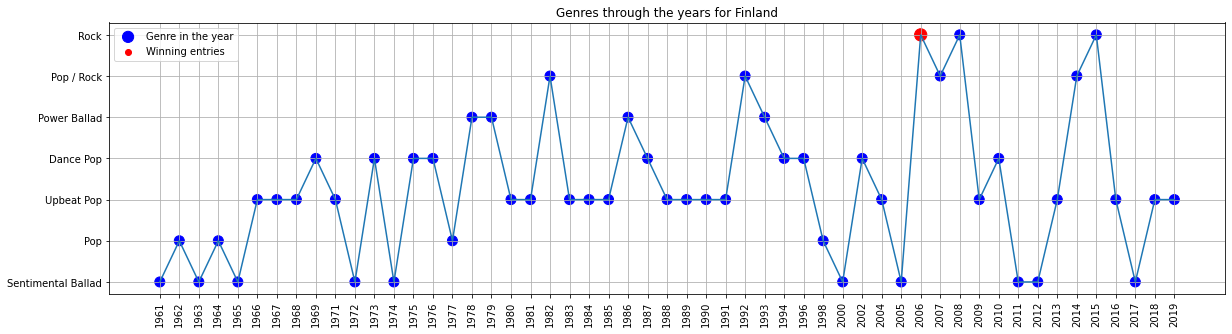

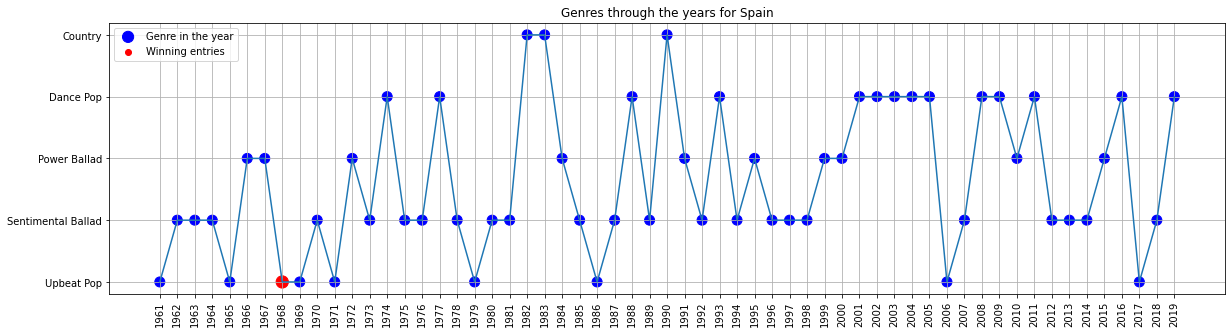

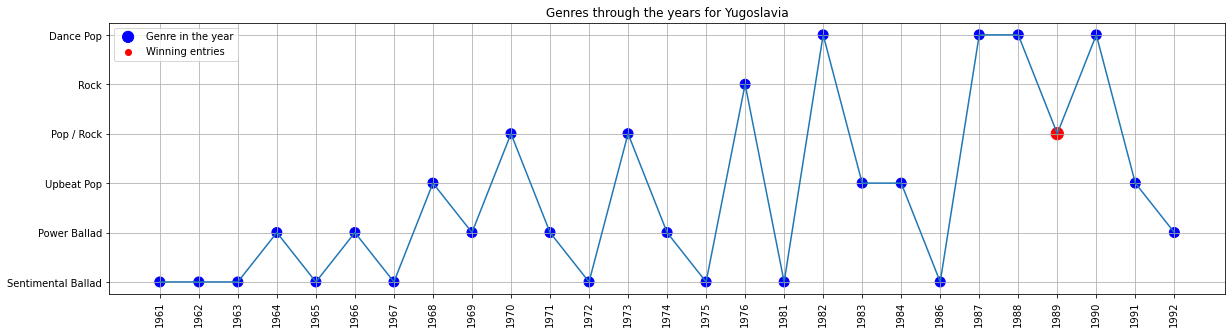

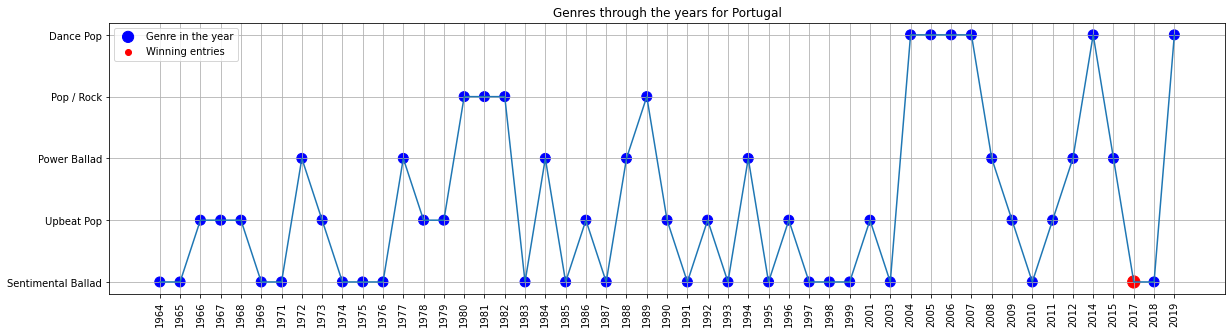

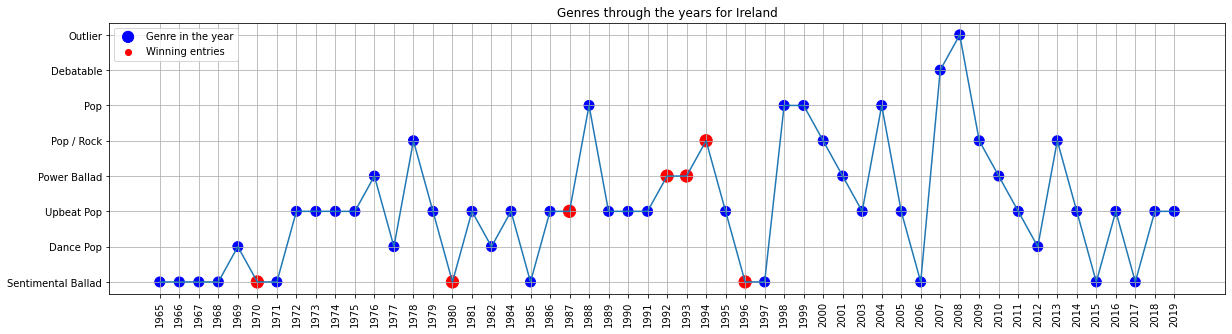

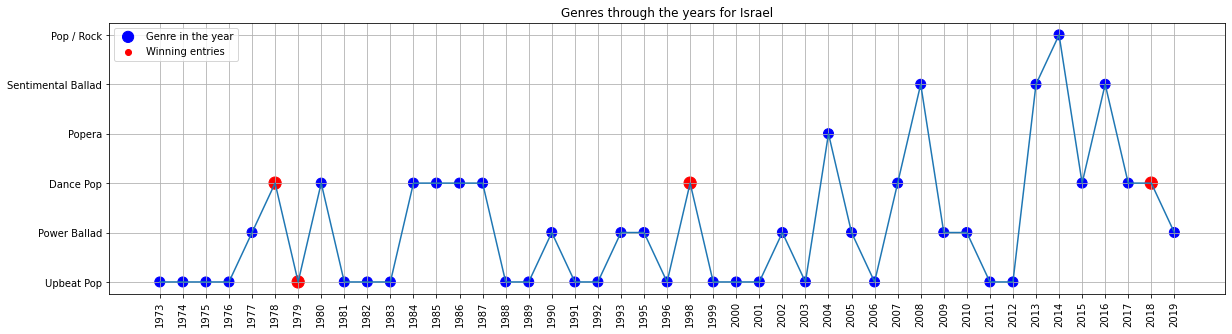

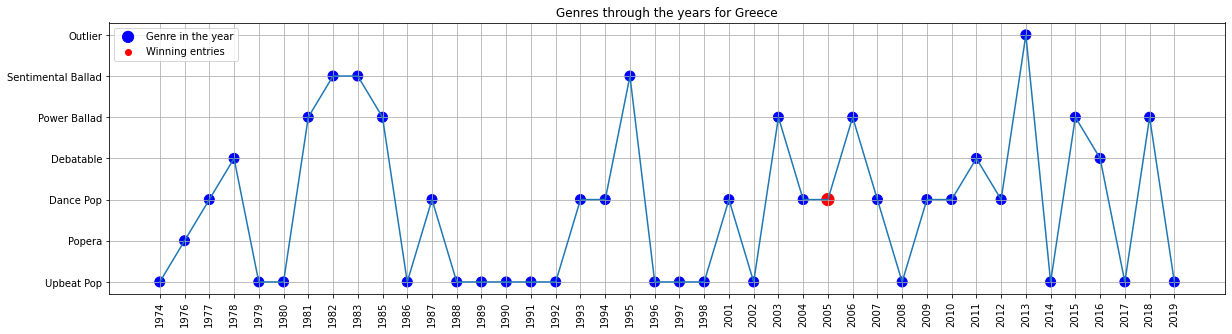

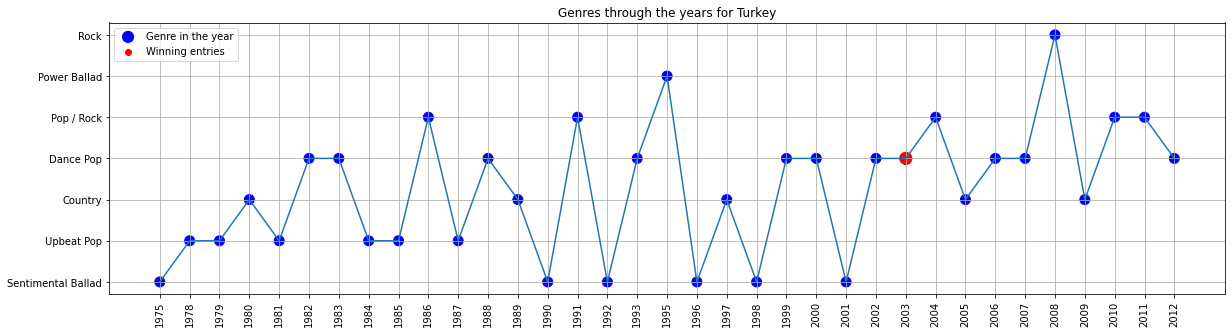

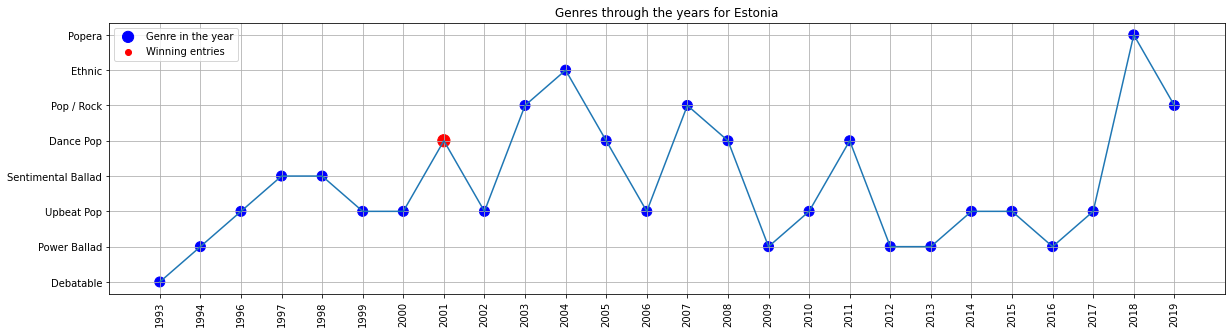

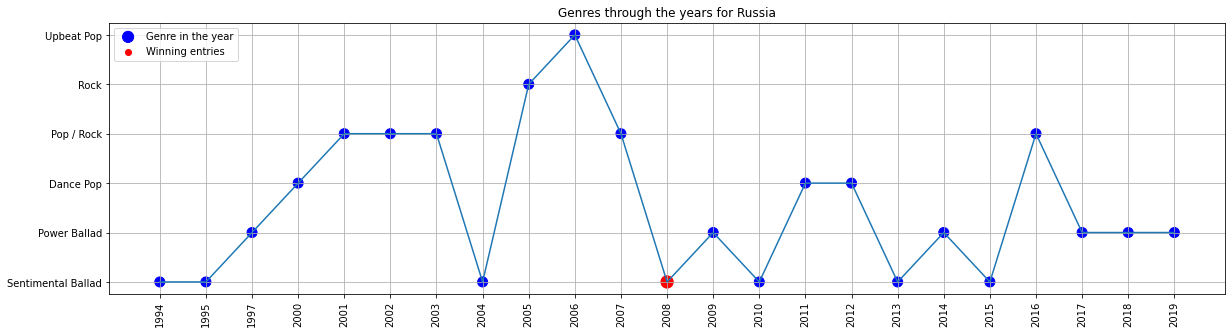

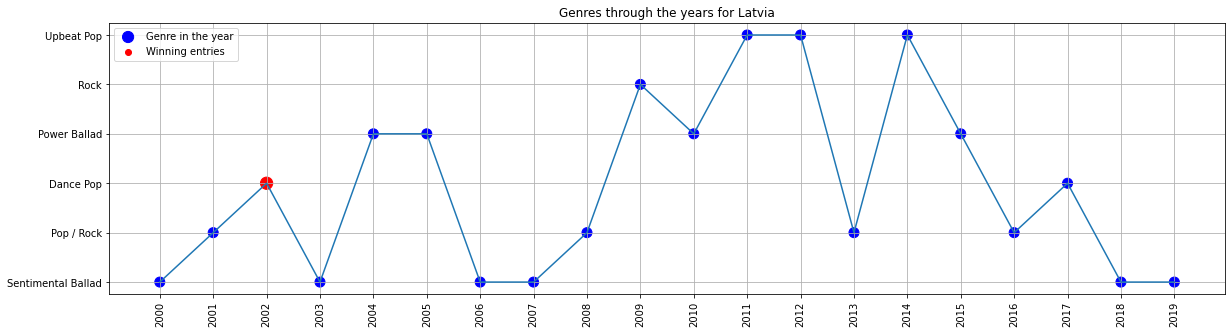

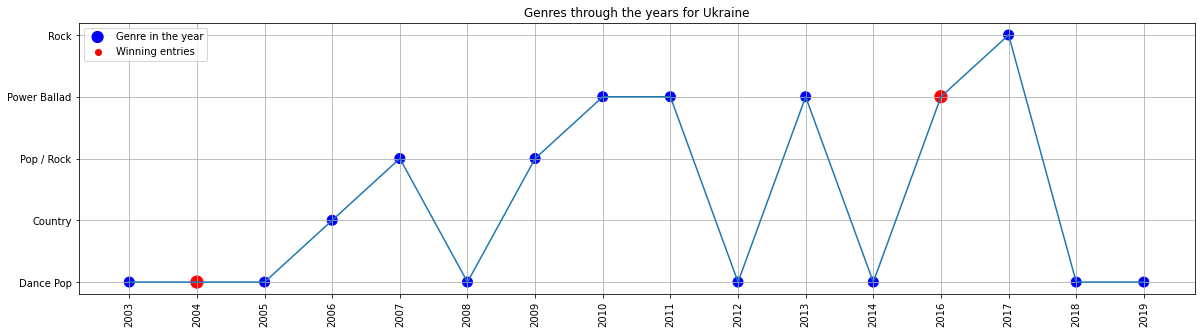

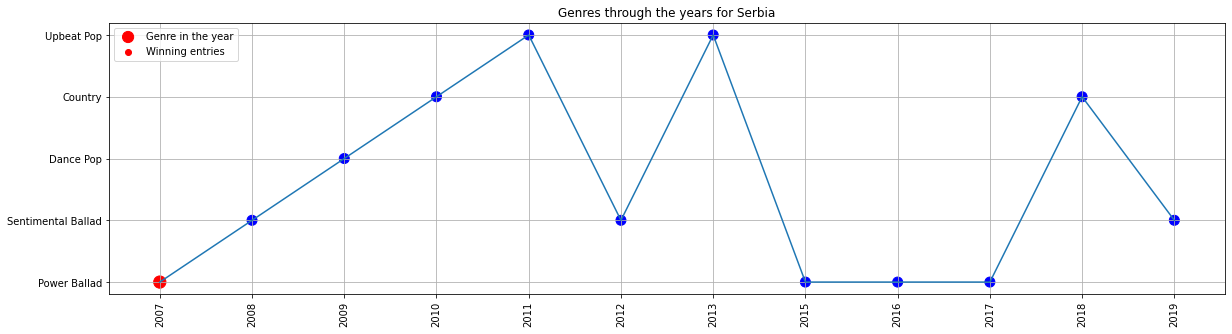

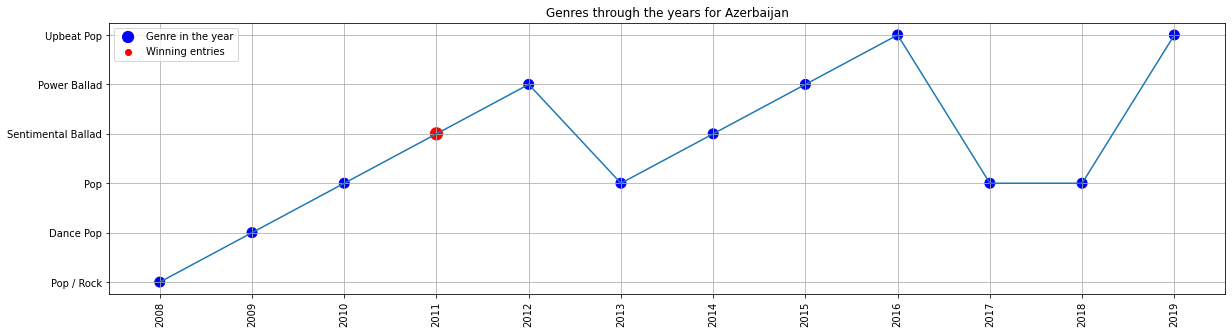

In [15]:
for country in ygc:
    ye=list(ygc[country].keys())
    va=list(ygc[country].values())
    col=[]
    size=[]
    for year in ye:
        if year != "1969" and winCoun[year]==country:
            col.append('r')
            size.append(150)
        else:
            col.append('b')
            size.append(100)
    plt.figure(figsize=(20, 5)).add_subplot()
    plt.scatter(ye, va, color=col, s = size, label="Genre in the year")
    plt.scatter([], [], color='r', label="Winning entries")
    plt.plot(ye, va )
    plt.title("Genres through the years for "+country)
    plt.xticks(rotation='90')
    plt.legend(loc='upper left');
    plt.grid(True)
    plt.show()

In the graphs above, we can see all the genres of all the entries of a certain country, as well as the winning songs.

In [16]:
numy=len(countries["Germany"])
numc=len(countries)
tab=[]

for i in range(0, numc):
    niz=[]
    for j in range(numy):
        niz.append(0)
    tab.append(niz)
    
numval={}
numval["Popera"]=1
numval["Sentimental Ballad"]=2
numval["Power Ballad"]=3
numval["Country"]=4
numval["Ethnic"]=5
numval["Pop"]=6
numval["Upbeat Pop"]=7
numval["Dance Pop"]=8
numval["Pop / Rock"]=9
numval["Rock"]=10
numval["Debatable"]=11
numval["Outlier"]=12
    
conid={}
brojac=0
for country in countries:
    conid[country]=brojac
    brojac+=1
    
yearsid={}
brojac=0
for year in years:
    yearsid[year]=brojac
    brojac+=1

for country in countries:
    brojac=0
    for genre in countries[country]:
        if genre!="/":
            tab[conid[country]][yearsid[years[brojac]]]=numval[genre.strip()]
        else:
            tab[conid[country]][yearsid[years[brojac]]]=0
        brojac+=1
    
L = sch.linkage(tab, method="average", metric="cosine")

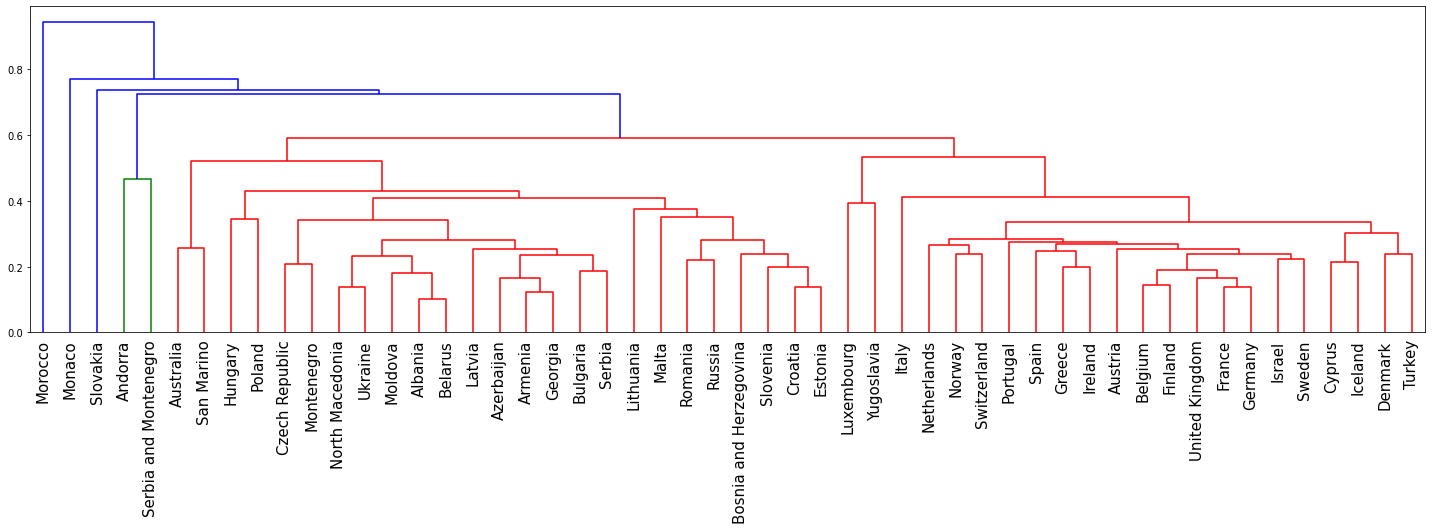

In [17]:
iminja = [country for country in conid]
plt.figure(figsize=(25, 6))
D = sch.dendrogram(L, labels = iminja, leaf_font_size=15)
plt.show()

Histogram according to genre. Genres are sorted according to similarity, and given values from 1-12.